In [1]:
pacman::p_load("tidyverse", "ggpubr", 'car')

In [2]:
df <- read_table2("STAT501_Lesson01/birthsmokers.txt")
head(df)

Parsed with column specification:
cols(
  Wgt = col_double(),
  Gest = col_double(),
  Smoke = col_character()
)

Warning message:
"1 parsing failure.
row   col expected        actual                                file
 32 Smoke          embedded null 'STAT501_Lesson01/birthsmokers.txt'
"


Wgt,Gest,Smoke
<dbl>,<dbl>,<chr>
2940,38,yes
3130,38,no
2420,36,yes
2450,34,no
2760,39,yes
2440,35,yes


In [3]:
df$Smoke <- as.factor(df$Smoke)

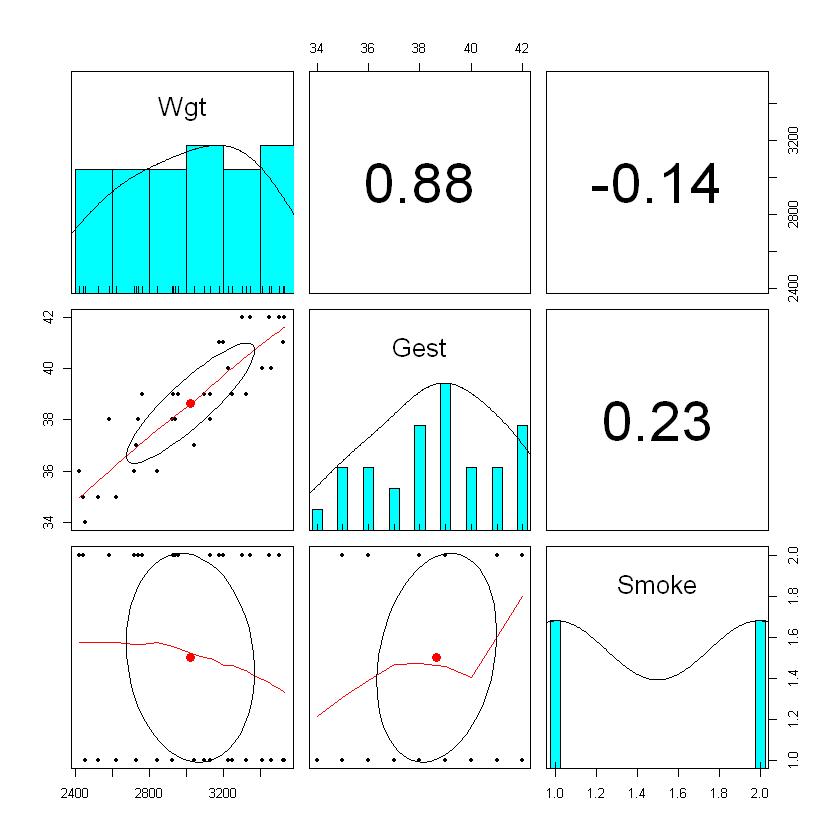

In [6]:
psych::pairs.panels(df)

In [16]:
df.non <- df%>% dplyr::filter(Smoke=='no')
lm.non <- lm(Wgt ~ Gest, data=df.non)
summary(lm.non)


Call:
lm(formula = Wgt ~ Gest, data = df.non)

Residuals:
    Min      1Q  Median      3Q     Max 
-171.52 -101.59   23.28   83.63  139.48 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2546.14     457.29  -5.568 6.93e-05 ***
Gest          147.21      11.97  12.294 6.85e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 106.9 on 14 degrees of freedom
Multiple R-squared:  0.9152,	Adjusted R-squared:  0.9092 
F-statistic: 151.1 on 1 and 14 DF,  p-value: 6.852e-09


In [17]:
df.yes <- df%>% dplyr::filter(Smoke=='yes')
lm.yes <- lm(Wgt ~ Gest, data=df.yes)
summary(lm.yes)


Call:
lm(formula = Wgt ~ Gest, data = df.yes)

Residuals:
    Min      1Q  Median      3Q     Max 
-228.53  -64.86  -19.10   93.89  184.53 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2474.56     553.97  -4.467 0.000532 ***
Gest          139.03      14.11   9.851 1.12e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 126.6 on 14 degrees of freedom
Multiple R-squared:  0.8739,	Adjusted R-squared:  0.8649 
F-statistic: 97.04 on 1 and 14 DF,  p-value: 1.125e-07


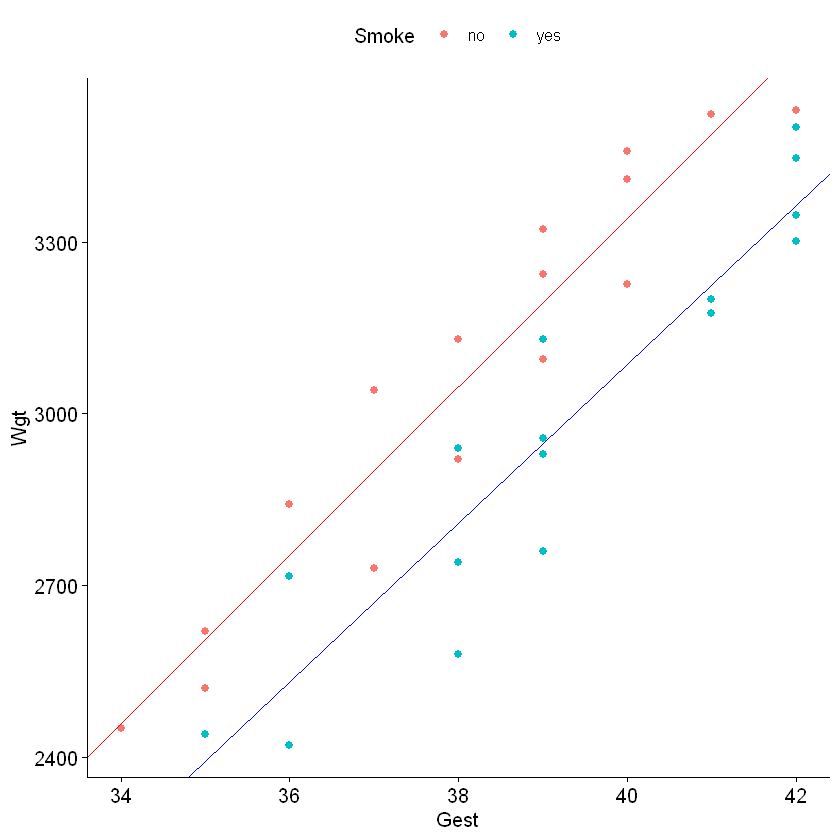

In [30]:
ggscatter(df, x='Gest', y="Wgt", col='Smoke') +
#ggplot(df, aes(Gest, Wgt)) + geom_point(aes(col=Smoke)) + theme_bw() +
geom_abline(intercept = -2546.14, slope = 147.21, col='red') +
geom_abline(intercept = -2474.56, slope = 139.03, col='blue')

In [32]:
lm.fll <- lm(Wgt ~ Gest + Smoke, data=df)
summary(lm.fll)


Call:
lm(formula = Wgt ~ Gest + Smoke, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-223.693  -92.063   -9.365   79.663  197.507 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2389.573    349.206  -6.843 1.63e-07 ***
Gest          143.100      9.128  15.677 1.07e-15 ***
Smokeyes     -244.544     41.982  -5.825 2.58e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 115.5 on 29 degrees of freedom
Multiple R-squared:  0.8964,	Adjusted R-squared:  0.8892 
F-statistic: 125.4 on 2 and 29 DF,  p-value: 5.289e-15


Warning message in abline(lm.fll):
"only using the first two of 3 regression coefficients"


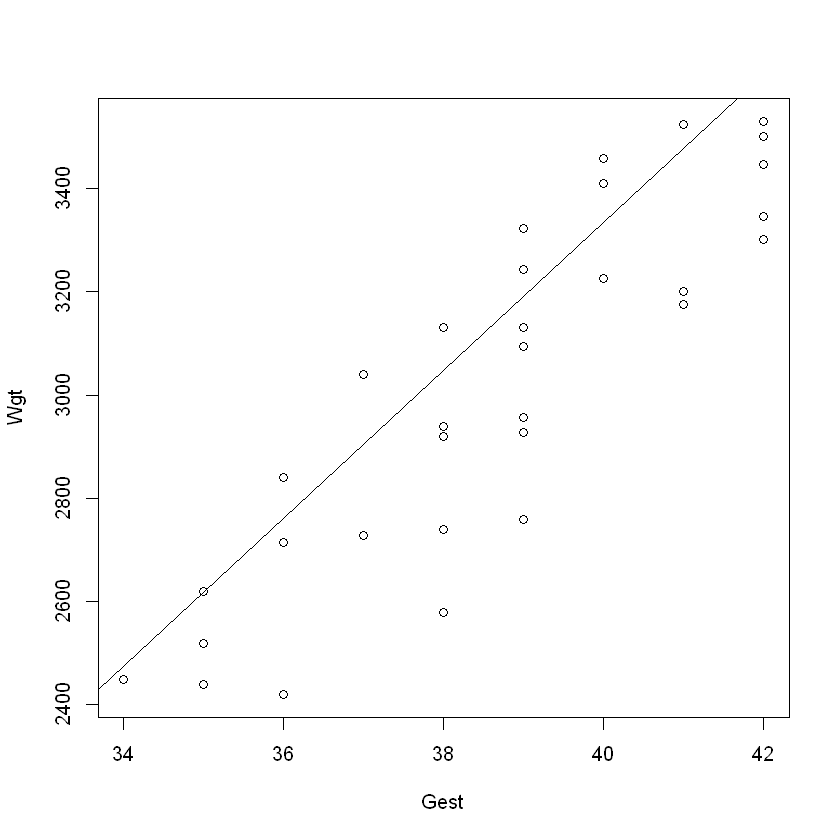

In [34]:
plot(Wgt ~ Gest, data=df)
abline(lm.fll)

## Interaction terms

In [2]:
df <- read_table2("STAT501_Lesson01/depression.txt")
head(df)

Parsed with column specification:
cols(
  y = col_double(),
  age = col_double(),
  x2 = col_double(),
  x3 = col_double(),
  TRT = col_character()
)

Warning message:
"1 parsing failure.
row col expected        actual                              file
 36 TRT          embedded null 'STAT501_Lesson01/depression.txt'
"


y,age,x2,x3,TRT
<dbl>,<dbl>,<dbl>,<dbl>,<chr>
56,21,1,0,A
41,23,0,1,B
40,30,0,1,B
28,19,0,0,C
55,28,1,0,A
25,23,0,0,C


In [4]:
glimpse(df)

Rows: 36
Columns: 5
$ y   <dbl> 56, 41, 40, 28, 55, 25, 46, 71, 48, 63, 52, 62, 50, 45, 58, 46,...
$ age <dbl> 21, 23, 30, 19, 28, 23, 33, 67, 42, 33, 33, 56, 45, 43, 38, 37,...
$ x2  <dbl> 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, ...
$ x3  <dbl> 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, ...
$ TRT <chr> "A", "B", "B", "C", "A", "C", "B", "C", "B", "A", "A", "C", "C"...


In [5]:
df$TRT <- as.factor(df$TRT)

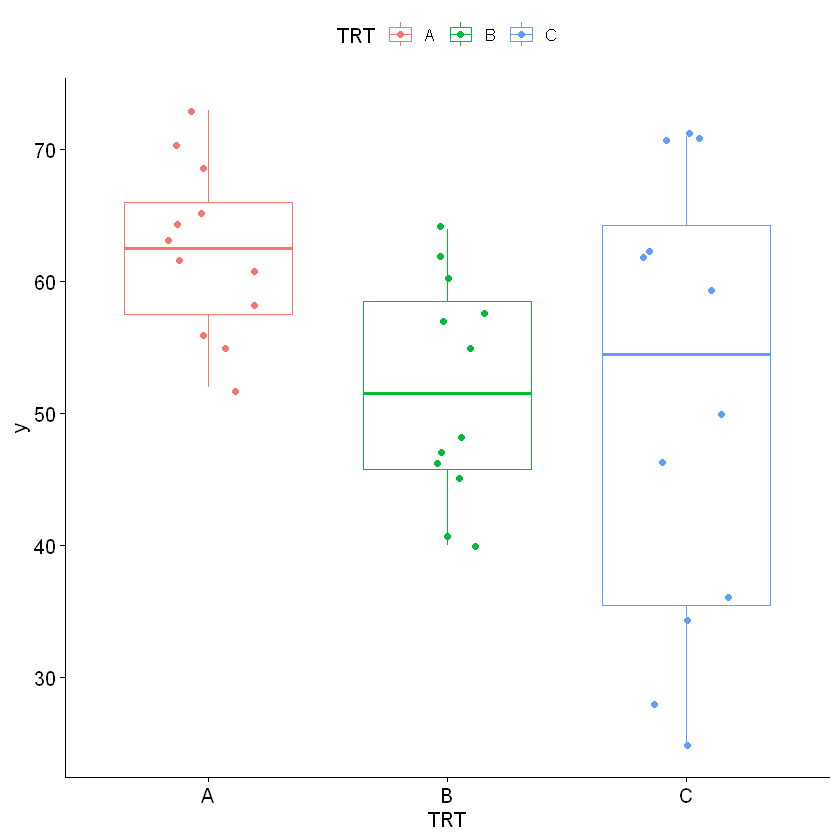

In [6]:
ggboxplot(df, x='TRT', y='y', col='TRT', add = 'jitter') 

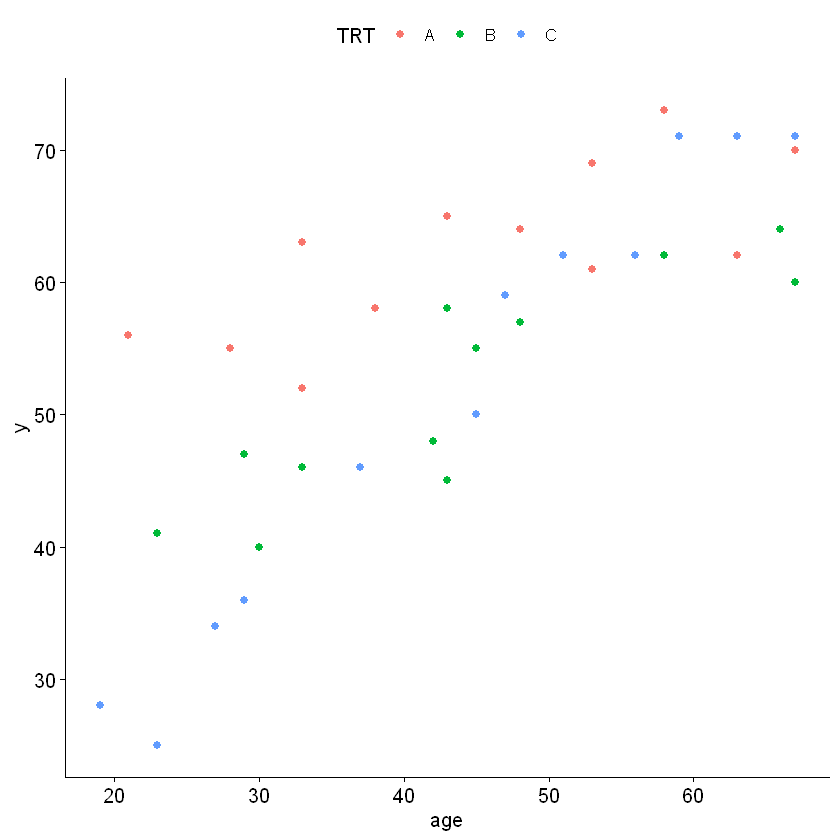

In [8]:
ggscatter(df, x='age', y='y', col='TRT')

In [9]:
slm <- lm(y ~ age + TRT ,data=df);summary(slm)


Call:
lm(formula = y ~ age + TRT, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-12.5732  -3.3922   0.9829   3.9613   9.5062 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  32.54335    3.58105   9.088 2.23e-10 ***
age           0.66446    0.06978   9.522 7.42e-11 ***
TRTB         -9.80758    2.46471  -3.979 0.000371 ***
TRTC        -10.25276    2.46542  -4.159 0.000224 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6.035 on 32 degrees of freedom
Multiple R-squared:  0.784,	Adjusted R-squared:  0.7637 
F-statistic: 38.71 on 3 and 32 DF,  p-value: 9.287e-11


In [11]:
lm_intrct <- lm(y ~ age + TRT + age:TRT ,data=df);summary(lm_intrct)


Call:
lm(formula = y ~ age + TRT + age:TRT, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.4366 -2.7637  0.1887  2.9075  6.5634 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  47.51559    3.82523  12.422 2.34e-13 ***
age           0.33051    0.08149   4.056 0.000328 ***
TRTB        -18.59739    5.41573  -3.434 0.001759 ** 
TRTC        -41.30421    5.08453  -8.124 4.56e-09 ***
age:TRTB      0.19318    0.11660   1.657 0.108001    
age:TRTC      0.70288    0.10896   6.451 3.98e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.925 on 30 degrees of freedom
Multiple R-squared:  0.9143,	Adjusted R-squared:  0.9001 
F-statistic: 64.04 on 5 and 30 DF,  p-value: 4.264e-15


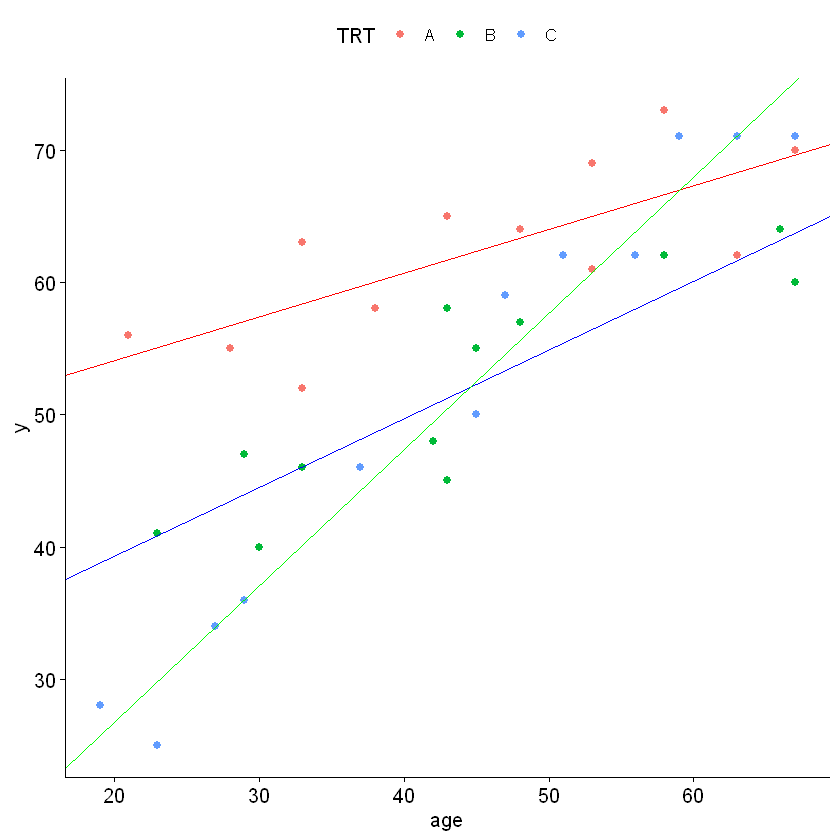

In [14]:
ggscatter(df, x='age', y='y', col='TRT') +
geom_abline(intercept = 47.5, slope = 0.33, col='red') +
geom_abline(intercept = 28.9, slope = 0.52, col='blue') +
geom_abline(intercept = 6.21, slope = 1.03, col='green')

## 8-9 Further Examaples

In [17]:
df <- read_table2("STAT501_Lesson01/Lesson8Ex1.txt")
head(df)

Parsed with column specification:
cols(
  Y = col_double(),
  X = col_double(),
  Cat = col_double(),
  D1 = col_double(),
  D2 = col_double(),
  D3 = col_double()
)



Y,X,Cat,D1,D2,D3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.78,2.06,1,1,0,0
4.35,2.69,3,0,0,1
7.60,3.25,2,0,1,0
3.36,2.09,3,0,0,1
4.79,3.31,3,0,0,1
3.73,2.80,1,1,0,0


In [18]:
glimpse(df)

Rows: 50
Columns: 6
$ Y   <dbl> 1.78, 4.35, 7.60, 3.36, 4.79, 3.73, 0.39, 2.67, 3.22, 4.68, 3.3...
$ X   <dbl> 2.06, 2.69, 3.25, 2.09, 3.31, 2.80, 0.30, 2.31, 1.43, 2.98, 1.5...
$ Cat <dbl> 1, 3, 2, 3, 3, 1, 3, 1, 2, 1, 3, 1, 3, 3, 2, 2, 3, 3, 1, 1, 2, ...
$ D1  <dbl> 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...
$ D2  <dbl> 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, ...
$ D3  <dbl> 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, ...


In [19]:
str(df)

tibble [50 x 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Y  : num [1:50] 1.78 4.35 7.6 3.36 4.79 3.73 0.39 2.67 3.22 4.68 ...
 $ X  : num [1:50] 2.06 2.69 3.25 2.09 3.31 2.8 0.3 2.31 1.43 2.98 ...
 $ Cat: num [1:50] 1 3 2 3 3 1 3 1 2 1 ...
 $ D1 : num [1:50] 1 0 0 0 0 1 0 1 0 1 ...
 $ D2 : num [1:50] 0 0 1 0 0 0 0 0 1 0 ...
 $ D3 : num [1:50] 0 1 0 1 1 0 1 0 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   Y = col_double(),
  ..   X = col_double(),
  ..   Cat = col_double(),
  ..   D1 = col_double(),
  ..   D2 = col_double(),
  ..   D3 = col_double()
  .. )


In [20]:
df$Cat <- as.factor(df$Cat)
glimpse(df)

Rows: 50
Columns: 6
$ Y   <dbl> 1.78, 4.35, 7.60, 3.36, 4.79, 3.73, 0.39, 2.67, 3.22, 4.68, 3.3...
$ X   <dbl> 2.06, 2.69, 3.25, 2.09, 3.31, 2.80, 0.30, 2.31, 1.43, 2.98, 1.5...
$ Cat <fct> 1, 3, 2, 3, 3, 1, 3, 1, 2, 1, 3, 1, 3, 3, 2, 2, 3, 3, 1, 1, 2, ...
$ D1  <dbl> 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...
$ D2  <dbl> 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, ...
$ D3  <dbl> 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, ...


In [23]:
levels(df$Cat)

[1] "1" "2" "3"

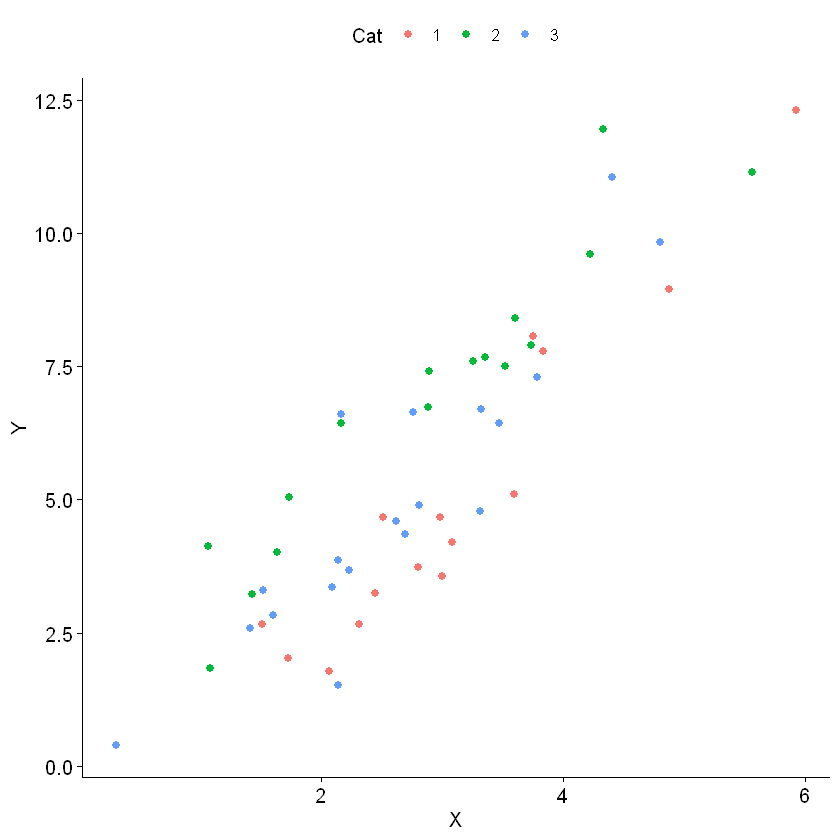

In [32]:
ggscatter(df, x='X', y='Y', col='Cat')

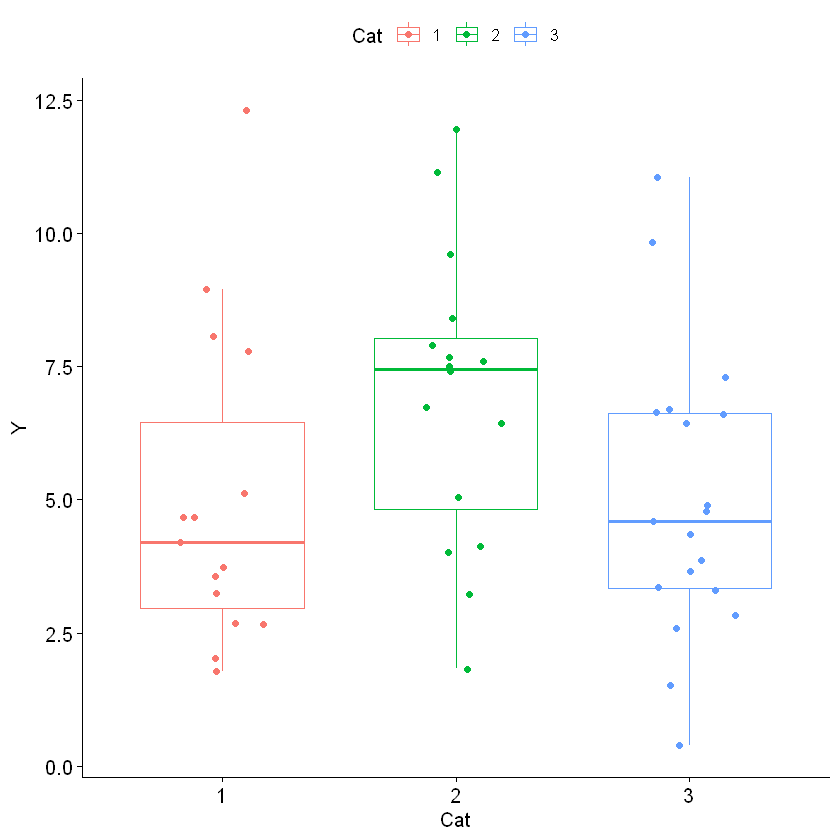

In [38]:
ggboxplot(df, x='Cat', y='Y', col='Cat', add='jitter')

In [24]:
slm <- lm(Y ~ X + Cat, data=df)
summary(slm)


Call:
lm(formula = Y ~ X + Cat, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4377 -0.6169 -0.1067  0.6571  2.6083 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.7688     0.4790  -3.693 0.000587 ***
X             2.1995     0.1283  17.141  < 2e-16 ***
Cat2          2.3012     0.3745   6.144 1.76e-07 ***
Cat3          1.0195     0.3645   2.797 0.007504 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.04 on 46 degrees of freedom
Multiple R-squared:  0.8778,	Adjusted R-squared:  0.8698 
F-statistic: 110.1 on 3 and 46 DF,  p-value: < 2.2e-16


In [25]:
round(anova(slm),2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
X,1,316.09,316.09,292.30,0
Cat,2,41.23,20.61,19.06,0
Residuals,46,49.74,1.08,NA,NA


In [26]:
round(Anova(slm,type=3),2)

,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),14.74,1,13.64,0
X,317.71,1,293.80,0
Cat,41.23,2,19.06,0
Residuals,49.74,46,NA,NA


In [27]:
slm.intct <- lm(Y ~ X + Cat + X:Cat, data=df)
summary(slm.intct)


Call:
lm(formula = Y ~ X + Cat + X:Cat, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4316 -0.5839 -0.1063  0.5062  2.6142 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -2.4335     0.7831  -3.107  0.00330 ** 
X             2.4145     0.2378  10.153 4.17e-13 ***
Cat2          3.4772     1.0234   3.398  0.00145 ** 
Cat3          1.6500     1.0104   1.633  0.10961    
X:Cat2       -0.3913     0.3162  -1.237  0.22256    
X:Cat3       -0.2019     0.3287  -0.614  0.54219    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.045 on 44 degrees of freedom
Multiple R-squared:  0.8819,	Adjusted R-squared:  0.8685 
F-statistic: 65.73 on 5 and 44 DF,  p-value: < 2.2e-16


In [28]:
anova(slm.intct)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
X,1,316.089883,316.0898831,289.352988,5.742792e-21
Cat,2,41.228344,20.6141721,18.870494,1.208597e-06
X:Cat,2,1.677591,0.8387957,0.767845,4.701285e-01
Residuals,44,48.065703,1.0924023,NA,NA


In [29]:
round(anova(slm, slm.intct),2)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,46,49.74,NA,NA,NA,NA
2,44,48.07,2,1.68,0.77,0.47


In [33]:
df2 <- read_table2("STAT501_Lesson01/Lesson8Ex2.txt")
head(df2)

Parsed with column specification:
cols(
  Y = col_double(),
  X = col_double(),
  Cat = col_double(),
  D1 = col_double(),
  D2 = col_double(),
  D3 = col_double()
)



Y,X,Cat,D1,D2,D3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6.92,2.06,1,1,0,0
8.75,2.69,3,0,0,1
13.40,3.25,2,0,1,0
7.76,2.09,3,0,0,1
9.19,3.31,3,0,0,1
7.32,2.80,1,1,0,0


In [34]:
df2$Cat <- as.factor(df2$Cat)

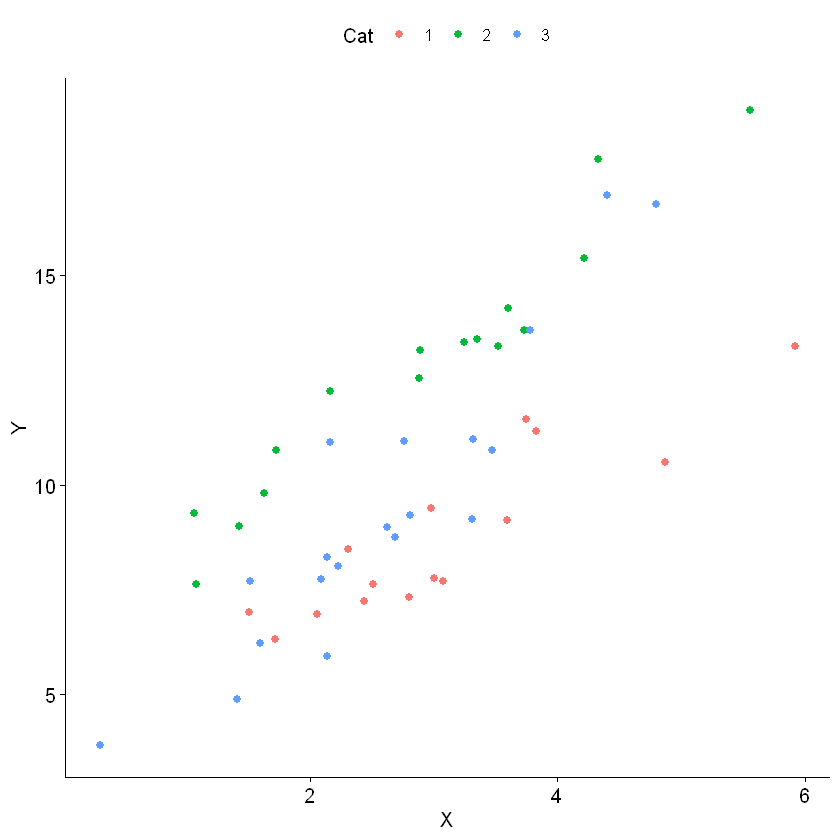

In [36]:
ggscatter(df2, x='X', y='Y', col='Cat')

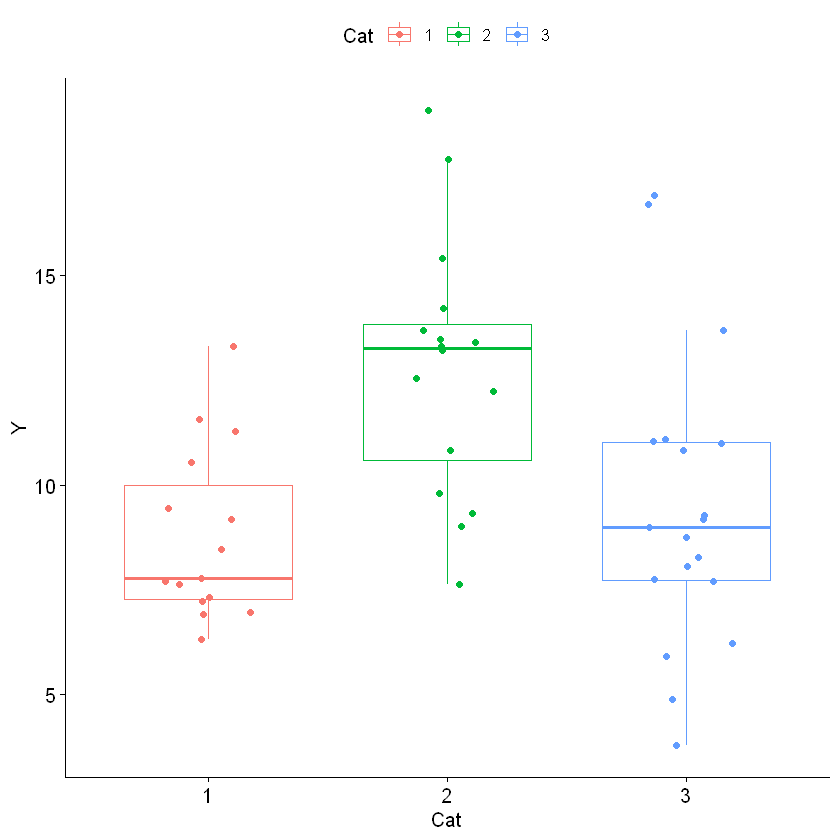

In [39]:
ggboxplot(df2, x='Cat', y='Y', col='Cat', add='jitter')

In [41]:
slm.intct <- lm(Y ~ X + Cat + X:Cat, data=df2);summary(slm.intct)


Call:
lm(formula = Y ~ X + Cat + X:Cat, data = df2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3798 -0.7255 -0.2237  0.7113  2.8614 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.9179     0.8286   4.728 2.35e-05 ***
X             1.5726     0.2516   6.250 1.45e-07 ***
Cat2          2.2694     1.0829   2.096 0.041891 *  
Cat3         -2.1952     1.0692  -2.053 0.046025 *  
X:Cat2        0.7069     0.3346   2.112 0.040360 *  
X:Cat3        1.4024     0.3478   4.032 0.000216 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.106 on 44 degrees of freedom
Multiple R-squared:  0.9052,	Adjusted R-squared:  0.8944 
F-statistic: 83.98 on 5 and 44 DF,  p-value: < 2.2e-16


In [42]:
df <- read_table2("STAT501_Lesson01/realestate.txt")
head(df)

Parsed with column specification:
cols(
  SalePrice = col_double(),
  SqFeet = col_double(),
  Beds = col_double(),
  Baths = col_double(),
  Air = col_double(),
  Garage = col_double(),
  Pool = col_double(),
  Year = col_double(),
  Quality = col_double(),
  Style = col_double(),
  Lot = col_double(),
  Highway = col_double()
)



SalePrice,SqFeet,Beds,Baths,Air,Garage,Pool,Year,Quality,Style,Lot,Highway
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
360.0,3.032,4,4,1,2,0,1972,2,1,22.221,0
340.0,2.058,4,2,1,2,0,1976,2,1,22.912,0
250.0,1.780,4,3,1,2,0,1980,2,1,21.345,0
205.5,1.638,4,2,1,2,0,1963,2,1,17.342,0
275.5,2.196,4,3,1,2,0,1968,2,7,21.786,0
248.0,1.966,4,3,1,5,1,1972,2,1,18.902,0


In [43]:
df$Air <- as.factor(df$Air)

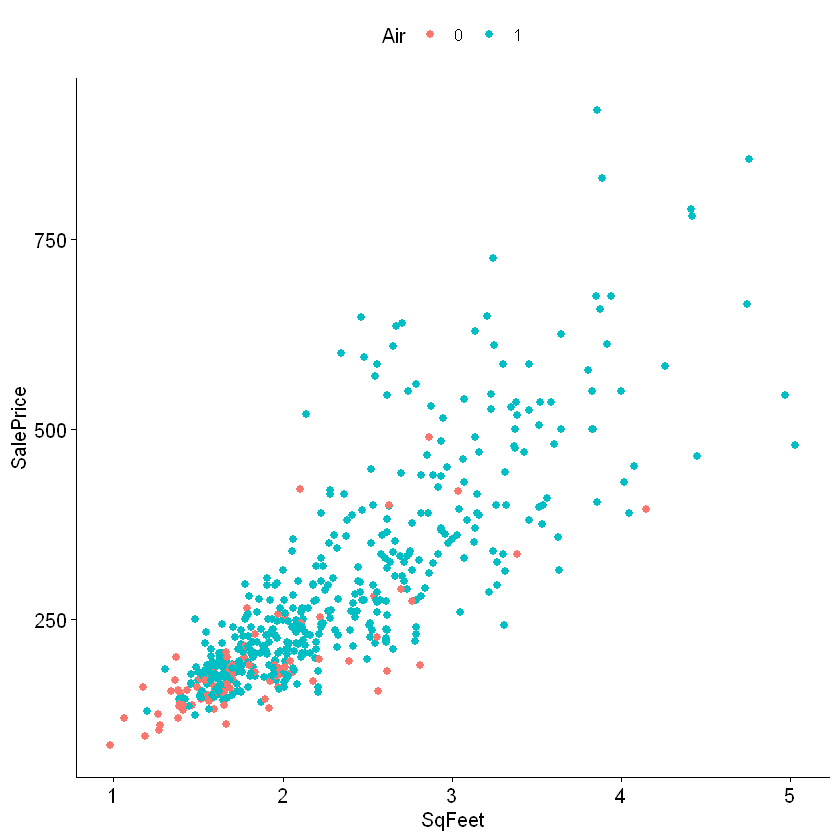

In [45]:
ggscatter(df, x='SqFeet', y='SalePrice', col='Air')

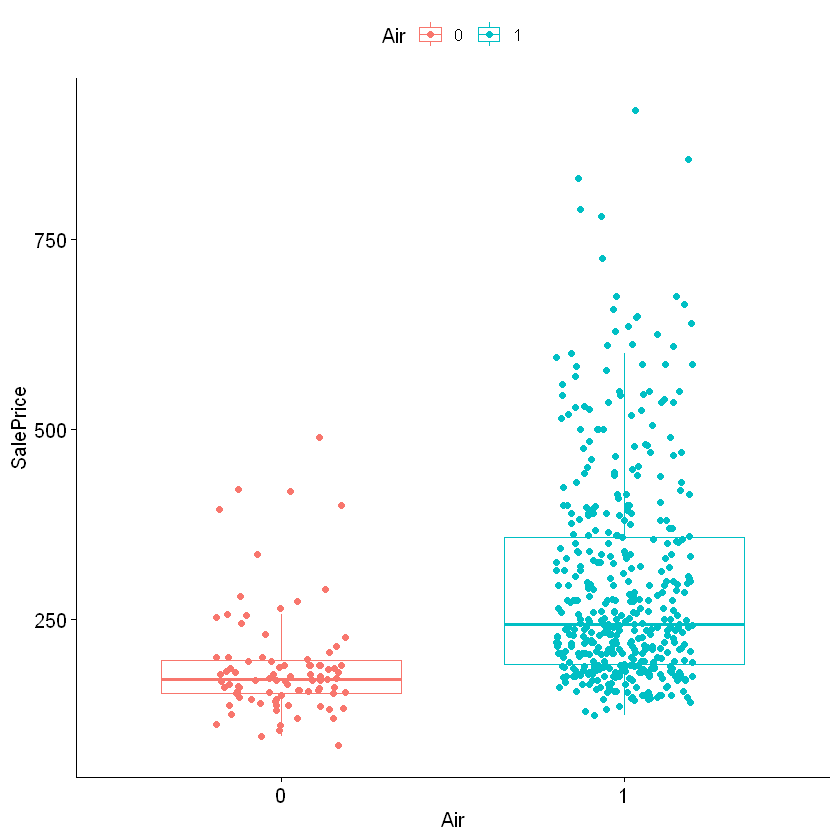

In [47]:
ggboxplot(df, x='Air', y='SalePrice', col='Air', add='jitter')

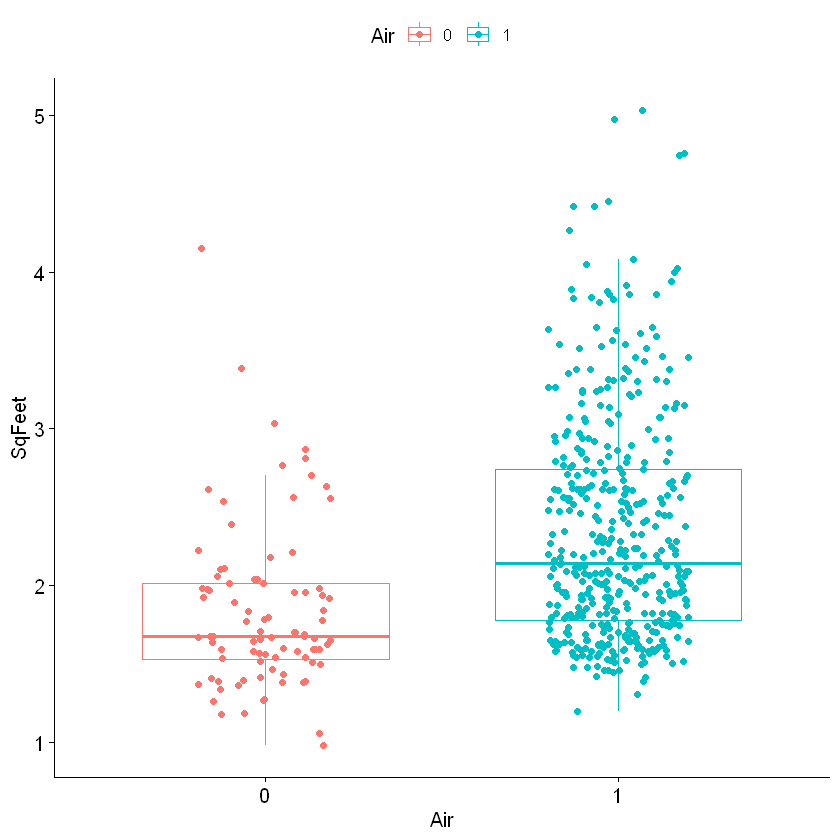

In [48]:
ggboxplot(df, x='Air', y='SqFeet', col='Air', add='jitter')

In [50]:
slm <- lm(SalePrice ~ SqFeet + Air + SqFeet:Air, data=df);summary(slm)


Call:
lm(formula = SalePrice ~ SqFeet + Air + SqFeet:Air, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-248.01  -37.13   -7.80   22.25  381.92 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -3.218     30.085  -0.107 0.914871    
SqFeet       104.902     15.748   6.661 6.96e-11 ***
Air1         -78.868     32.663  -2.415 0.016100 *  
SqFeet:Air1   55.888     16.580   3.371 0.000805 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 77.01 on 517 degrees of freedom
Multiple R-squared:  0.6887,	Adjusted R-squared:  0.6869 
F-statistic: 381.2 on 3 and 517 DF,  p-value: < 2.2e-16


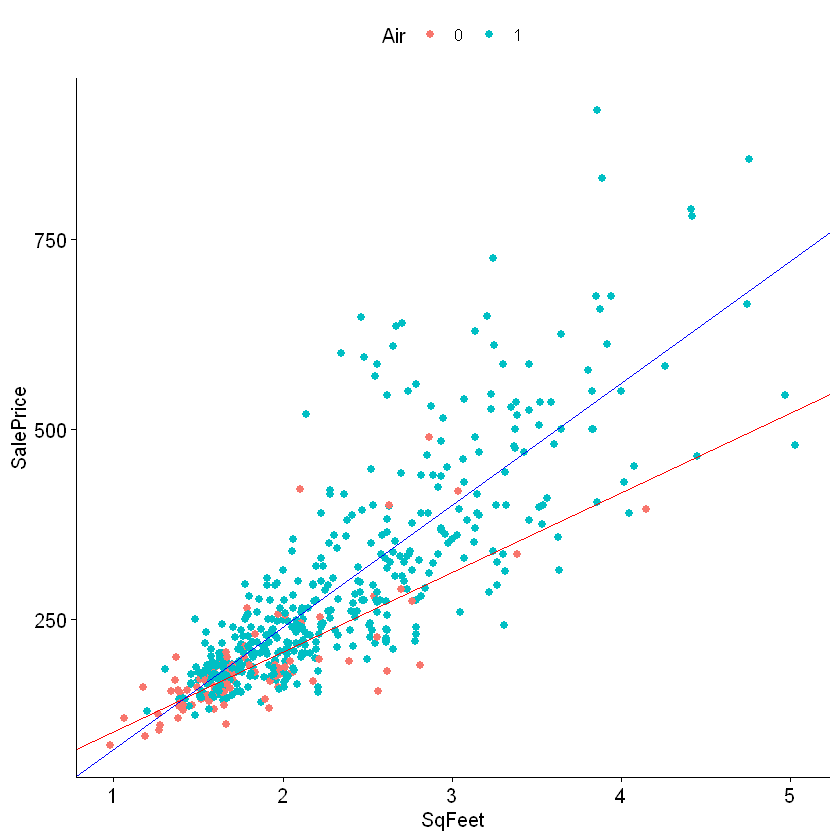

In [52]:
ggscatter(df, x='SqFeet', y='SalePrice', col='Air') + 
geom_abline(intercept = -3.218, slope = 104.902, col='red') +
geom_abline(intercept = -82.086, slope = 160.79, col='blue') 

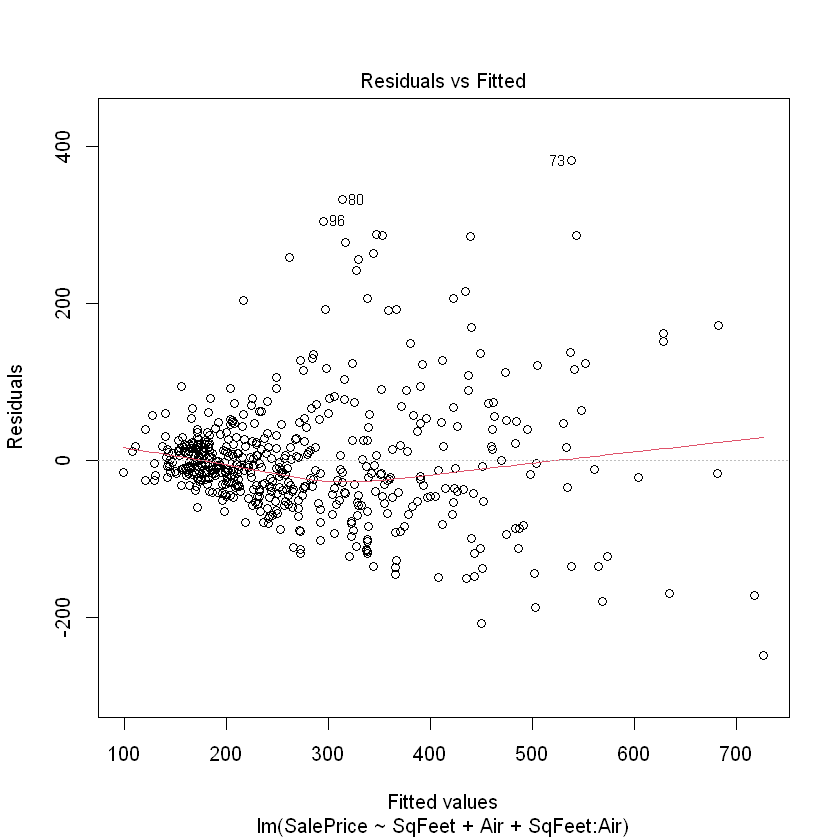

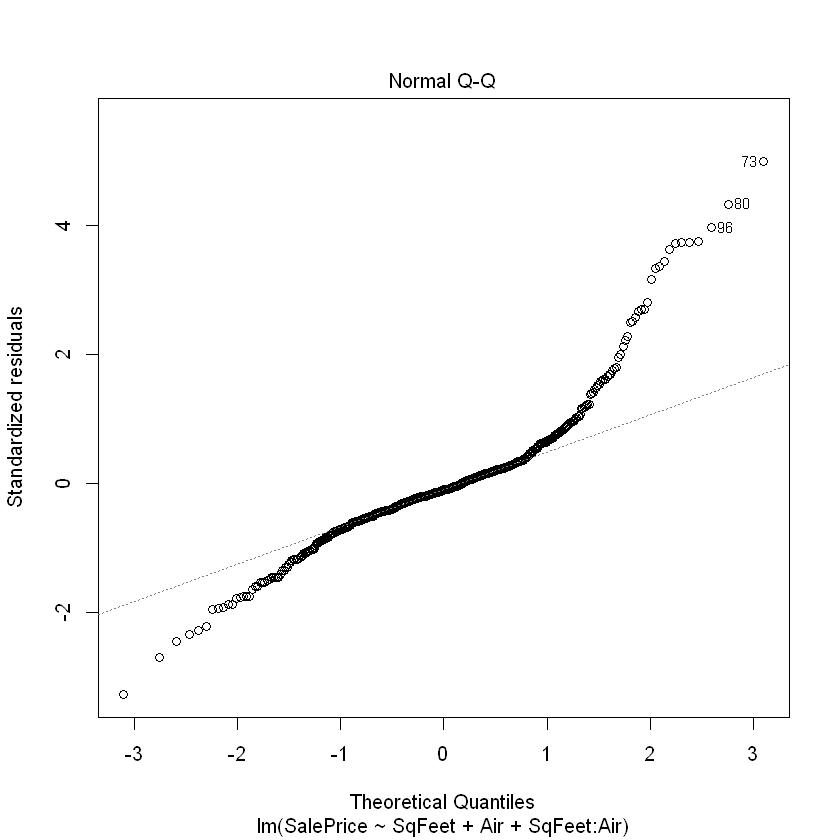

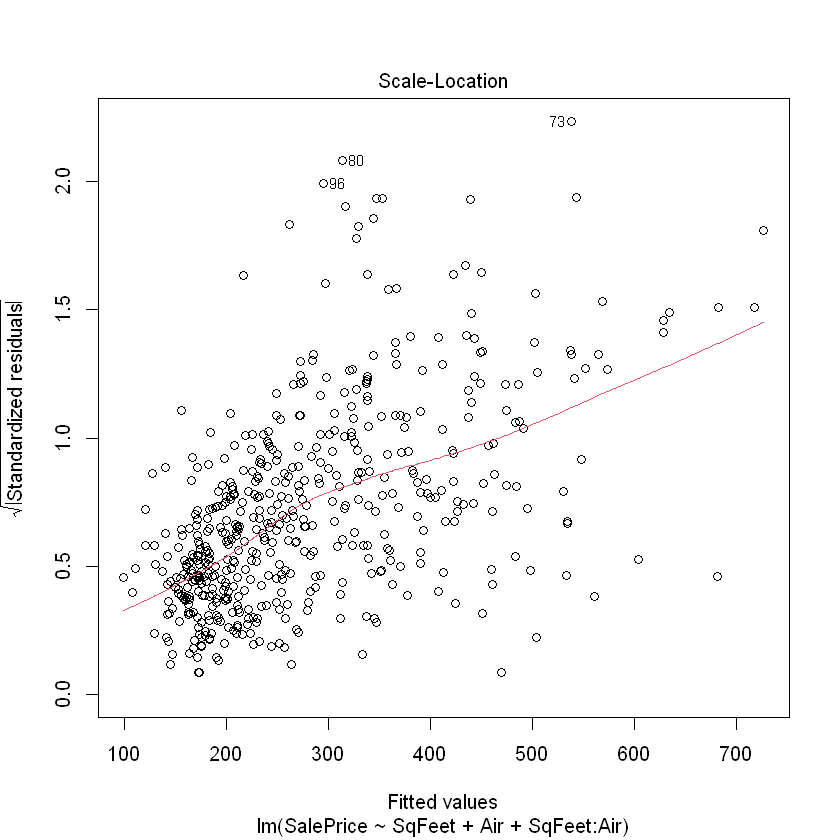

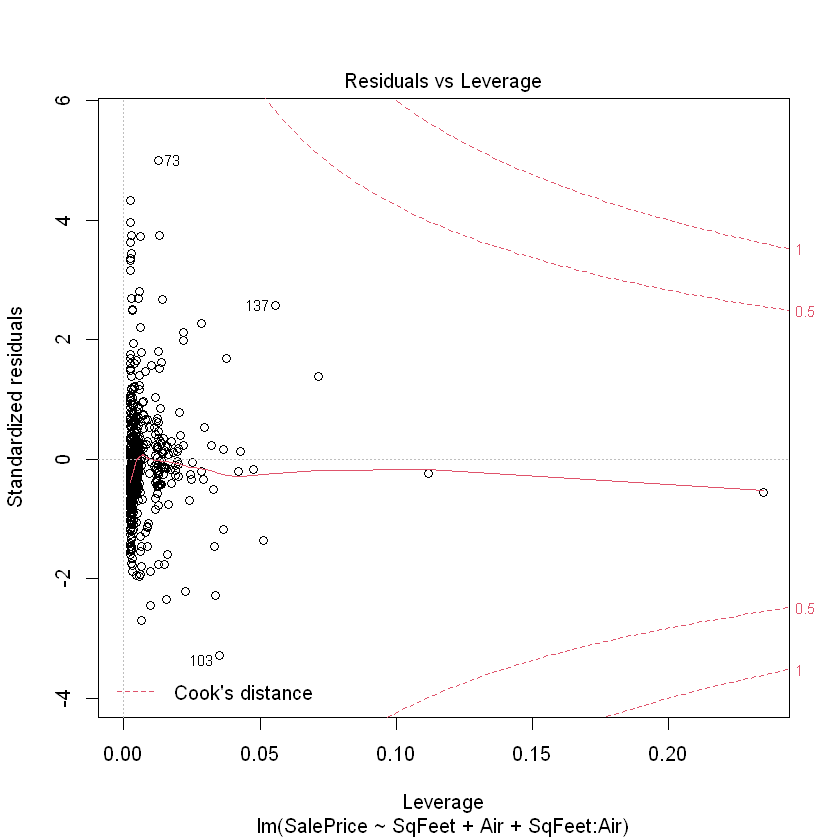

In [53]:
plot(slm)

## R Help 8:Categorical Predictors

In [54]:
birthsmokers <- read.table("STAT501_Lesson01/birthsmokers.txt", header=T)


The following objects are masked from birthsmokers (pos = 3):

    Gest, Smoke, Wgt




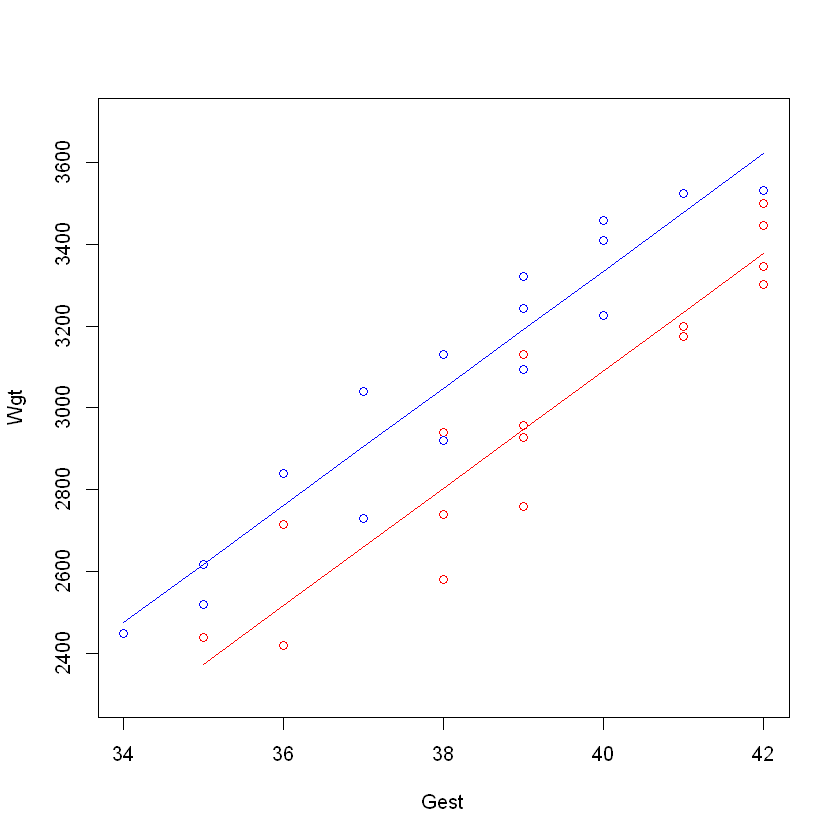

In [56]:
attach(birthsmokers)
 

model <- lm(Wgt ~ Gest + Smoke)
 
plot(x=Gest, y=Wgt, ylim=c(2300, 3700), 
     col=ifelse(Smoke=="yes", "red", "blue"),
     panel.last = c(lines(sort(Gest[Smoke=="no"]),
                          fitted(model)[Smoke=="no"][order(Gest[Smoke=="no"])],
                          col="blue"),
                    lines(sort(Gest[Smoke=="yes"]),
                          fitted(model)[Smoke=="yes"][order(Gest[Smoke=="yes"])],
                          col="red")))

In [57]:
summary(model)
#              Estimate Std. Error t value Pr(>|t|)    
# (Intercept) -2389.573    349.206  -6.843 1.63e-07 ***
# Gest          143.100      9.128  15.677 1.07e-15 ***
# Smokeyes     -244.544     41.982  -5.825 2.58e-06 ***
# ---
# Residual standard error: 115.5 on 29 degrees of freedom
# Multiple R-squared:  0.8964,  Adjusted R-squared:  0.8892 
# F-statistic: 125.4 on 2 and 29 DF,  p-value: 5.289e-15
 
confint(model)
#                  2.5 %     97.5 %
# (Intercept) -3103.7795 -1675.3663
# Gest          124.4312   161.7694
# Smokeyes     -330.4064  -158.6817
 
predict(model, interval="confidence",
        newdata=data.frame(Gest=c(38, 38), Smoke=c("yes", "no")))
#        fit      lwr      upr
# 1 2803.693 2740.599 2866.788
# 2 3048.237 2989.120 3107.355


Call:
lm(formula = Wgt ~ Gest + Smoke)

Residuals:
     Min       1Q   Median       3Q      Max 
-223.693  -92.063   -9.365   79.663  197.507 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2389.573    349.206  -6.843 1.63e-07 ***
Gest          143.100      9.128  15.677 1.07e-15 ***
Smokeyes     -244.544     41.982  -5.825 2.58e-06 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 115.5 on 29 degrees of freedom
Multiple R-squared:  0.8964,	Adjusted R-squared:  0.8892 
F-statistic: 125.4 on 2 and 29 DF,  p-value: 5.289e-15


,2.5 %,97.5 %
(Intercept),-3103.7795,-1675.3663
Gest,124.4312,161.7694
Smokeyes,-330.4064,-158.6817


,fit,lwr,upr
1,2803.693,2740.599,2866.788
2,3048.237,2989.120,3107.355
